In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df=pd.read_csv('Indicators/macro_monthly.csv')
df.head()

,DATE,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
0,1981-01-01,7.5,10.9,1612.900,4980.4,1870.0,NaN,12.568571,19.084516,NaN,51.1668,85.4
1,1981-02-01,7.4,10.8,1608.125,4965.0,1884.2,NaN,13.194444,15.934286,NaN,50.9509,85.9
2,1981-03-01,7.4,10.8,1629.400,4979.0,1902.9,NaN,13.115909,14.703871,NaN,51.2066,86.4
3,1981-04-01,7.2,10.9,1665.575,4965.1,1904.4,NaN,13.679524,15.719000,NaN,50.9711,87.0
4,1981-05-01,7.5,11.0,1655.150,4974.8,1913.8,NaN,14.099500,18.517742,NaN,51.2645,87.8


In [25]:
df['DATE'] = pd.to_datetime(df['DATE'])
filtered_df = df[(df['DATE'] >= "2015-01-01") & (df['DATE'] <= "2020-01-01")]

print(filtered_df)

          DATE  unrate  psr         m2    dspic      pce    reer        ir  \
408 2015-01-01     5.7  8.0  11759.100  13224.7  12036.5  106.11  1.881500   
409 2015-02-01     5.5  8.1  11818.575  13271.8  12083.1  107.42  1.975263   
410 2015-03-01     5.4  7.7  11943.020  13233.7  12132.2  109.65  2.042727   
411 2015-04-01     5.4  7.6  12020.125  13262.8  12170.3  109.04  1.935000   
412 2015-05-01     5.6  7.5  11896.350  13284.7  12233.6  108.55  2.197500   
..         ...     ...  ...        ...      ...      ...     ...       ...   
464 2019-09-01     3.5  7.3  14997.260  14807.9  14564.7  118.86  1.699500   
465 2019-10-01     3.6  7.4  15127.825  14821.4  14607.9  118.05  1.706818   
466 2019-11-01     3.6  7.5  15258.000  14885.9  14667.6  117.41  1.812105   
467 2019-12-01     3.6  7.3  15416.200  14844.1  14686.3  116.51  1.862857   
468 2020-01-01     3.5  7.8  15428.725  14976.5  14769.9  115.93  1.757619   

         ffer        tcs    indpro     ccpi  
408  0.114839  10

In [26]:
df2=pd.read_csv('Data/StocksJoined.csv')
df2['Date'] = pd.to_datetime(df2['Date'])
df2.head()

,Date,ticker_symbol,Open,High,Low
0,2015-01-02,AAPL,27.847500,27.860001,26.837500
1,2015-01-05,AAPL,27.072500,27.162500,26.352501
2,2015-01-06,AAPL,26.635000,26.857500,26.157499
3,2015-01-07,AAPL,26.799999,27.049999,26.674999
4,2015-01-08,AAPL,27.307501,28.037500,27.174999


In [27]:
filtered_df['period']=filtered_df['DATE'].dt.to_period('M')
filtered_df.head

/tmp/ipykernel_28671/729286613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['period']=filtered_df['DATE'].dt.to_period('M')


<bound method NDFrame.head of           DATE  unrate  psr         m2    dspic      pce    reer        ir  \
408 2015-01-01     5.7  8.0  11759.100  13224.7  12036.5  106.11  1.881500   
409 2015-02-01     5.5  8.1  11818.575  13271.8  12083.1  107.42  1.975263   
410 2015-03-01     5.4  7.7  11943.020  13233.7  12132.2  109.65  2.042727   
411 2015-04-01     5.4  7.6  12020.125  13262.8  12170.3  109.04  1.935000   
412 2015-05-01     5.6  7.5  11896.350  13284.7  12233.6  108.55  2.197500   
..         ...     ...  ...        ...      ...      ...     ...       ...   
464 2019-09-01     3.5  7.3  14997.260  14807.9  14564.7  118.86  1.699500   
465 2019-10-01     3.6  7.4  15127.825  14821.4  14607.9  118.05  1.706818   
466 2019-11-01     3.6  7.5  15258.000  14885.9  14667.6  117.41  1.812105   
467 2019-12-01     3.6  7.3  15416.200  14844.1  14686.3  116.51  1.862857   
468 2020-01-01     3.5  7.8  15428.725  14976.5  14769.9  115.93  1.757619   

         ffer        tcs    indpr

In [28]:
df2['period']=df2['Date'].dt.to_period('M')
df2.head()

,Date,ticker_symbol,Open,High,Low,period
0,2015-01-02,AAPL,27.847500,27.860001,26.837500,2015-01
1,2015-01-05,AAPL,27.072500,27.162500,26.352501,2015-01
2,2015-01-06,AAPL,26.635000,26.857500,26.157499,2015-01
3,2015-01-07,AAPL,26.799999,27.049999,26.674999,2015-01
4,2015-01-08,AAPL,27.307501,28.037500,27.174999,2015-01


In [29]:
merged_df = df2.merge(filtered_df, on='period', how='inner')
df=merged_df[['Date', 'ticker_symbol', 'Open', 'High', 'Low', 'unrate', 'psr', 'm2', 'dspic', 'pce', 'reer', 'ir', 'ffer', 'tcs', 'indpro', 'ccpi']]
df.head(25)

,Date,ticker_symbol,Open,High,Low,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
0,2015-01-02,AAPL,27.847500,27.860001,26.837500,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.8815,0.114839,1069010.0,102.8479,239.811
1,2015-01-05,AAPL,27.072500,27.162500,26.352501,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.8815,0.114839,1069010.0,102.8479,239.811
2,2015-01-06,AAPL,26.635000,26.857500,26.157499,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.8815,0.114839,1069010.0,102.8479,239.811
3,2015-01-07,AAPL,26.799999,27.049999,26.674999,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.8815,0.114839,1069010.0,102.8479,239.811
4,2015-01-08,AAPL,27.307501,28.037500,27.174999,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.8815,0.114839,1069010.0,102.8479,239.811
5,2015-01-09,AAPL,28.167500,28.312500,27.552500,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.8815,0.114839,1069010.0,102.8479,239.811
6,2015-01-12,AAPL,28.150000,28.157499,27.200001,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.8815,0.114839,1069010.0,102.8479,239.811
7,2015-01-13,AAPL,27.857500,28.200001,27.227501,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.8815,0.114839,1069010.0,102.8479,239.811
8,2015-01-14,AAPL,27.260000,27.622499,27.125000,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.8815,0.114839,1069010.0,102.8479,239.811
9,2015-01-15,AAPL,27.500000,27.514999,26.665001,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.8815,0.114839,1069010.0,102.8479,239.811


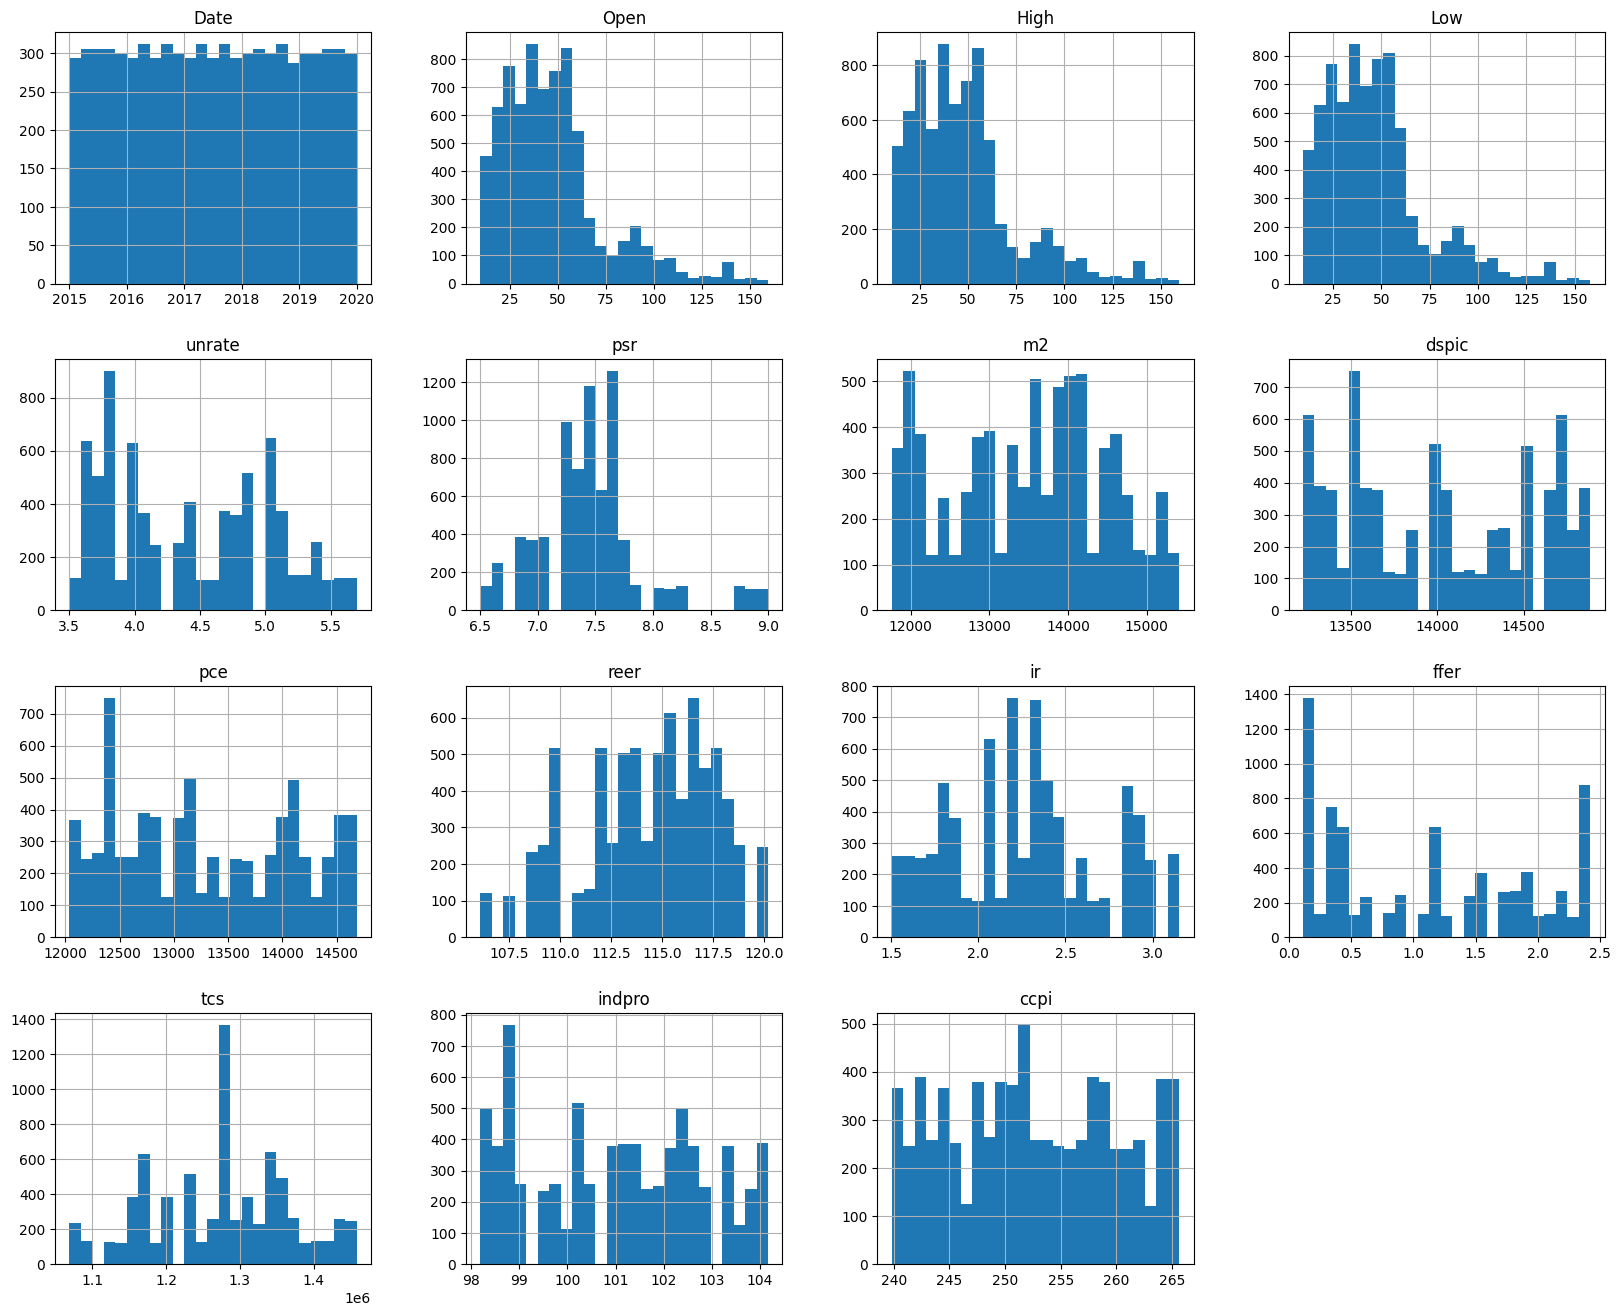

In [31]:
df.hist(figsize=(20,16),bins=25)
plt.show()

In [32]:
df.to_csv("Data/Incomplete.csv", index=False)